### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop any null values and duplicates
application_df.dropna(inplace=True)
application_df.drop_duplicates(inplace=True)

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME"],inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot: ylabel='Density'>

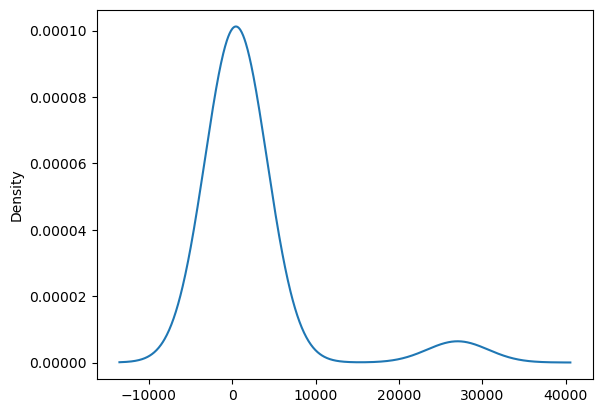

In [6]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts.head(50)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
C2190        1
C4200        1
C2600        1
C5200        1
C1370        1
Name: CLASSIFICATION, dtype: int64

<AxesSubplot: ylabel='Density'>

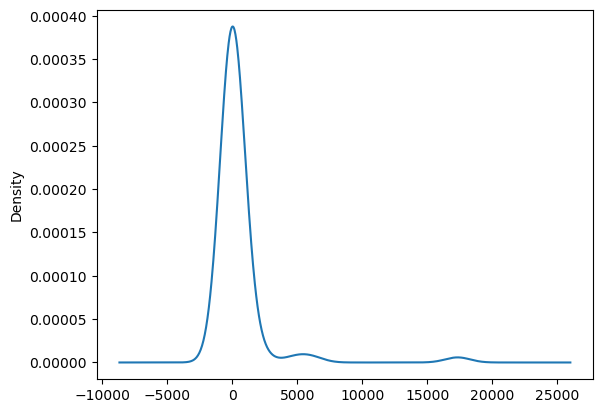

In [9]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts<1880].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
new_class_counts = application_df.CLASSIFICATION.value_counts()
new_class_counts

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Check the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [12]:
# # Look at INCOME_AMT value counts for binning
# income_counts = application_df.INCOME_AMT.value_counts()
# income_counts.head(50)

In [13]:
# # Visualize the value counts of INCOME_AMT
# income_counts.plot.density()

In [14]:
# # Determine which values to replace if counts are less than ..?
# # inc_list = ['10M-50M','5M-10M','50M+']
# replace_income = list(income_counts[income_counts<500].index)

# # Replace in dataframe
# for inc in replace_income:
#     application_df.INCOME_AMT = application_df.INCOME_AMT.replace(inc,"Other")
    
# # Check to make sure binning was successful
# new_income_counts = application_df.INCOME_AMT.value_counts()
# new_income_counts

In [15]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [16]:
# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head(20)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.tail(20)

C:\Users\WangTech\AppData\Local\Temp\ipykernel_47784\4109288422.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34279,1,11442,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34280,1,401661,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34281,1,56261,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34282,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34283,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34284,1,3384856,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34285,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34286,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34287,1,6713,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34288,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Attempt 1 - Drop ASK_AMT and STATUS columns

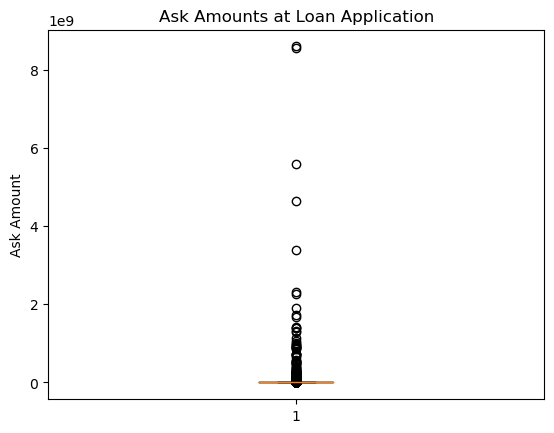

In [19]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of ASK_AMT
fig1, ax1 = plt.subplots()
ax1.set_title('Ask Amounts at Loan Application')
ax1.set_ylabel('Ask Amount')
ax1.boxplot(application_df[['ASK_AMT']])
plt.show()

In [20]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(application_df[['ASK_AMT']],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
mode_amt = application_df[['ASK_AMT']].mode()
mean_amt = application_df[['ASK_AMT']].mean()

application_df[['ASK_AMT']].describe()

# Print the the potential outliers
# potential_outliers = [print(f'{amt}') if amt <= lower_bound or amt >= upper_bound else next for amt in application_df[['ASK_AMT']].values]
# print(f'The Mode is: {mode_amt}')
# print(f'The Mean is: {mean_amt}')

,ASK_AMT
count,3.429900e+04
mean,2.769199e+06
std,8.713045e+07
min,5.000000e+03
25%,5.000000e+03
50%,5.000000e+03
75%,7.742000e+03
max,8.597806e+09


In [21]:
attempt_1_df = application_df.drop(columns=['ASK_AMT','STATUS'])

In [22]:
# Split our preprocessed data into our features and target arrays
y = attempt_1_df["IS_SUCCESSFUL"].values.reshape(-1,1)
X = attempt_1_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\WangTech\AppData\Local\Temp\ipykernel_47784\1187756357.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = attempt_1_df.drop(["IS_SUCCESSFUL"],1).values


In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 30
hidden_nodes_layer4 = 15
hidden_nodes_layer5 = 30
hidden_nodes_layer6 = 10
hidden_nodes_layer7 = 5
output_features = len(application_df[["IS_SUCCESSFUL"]].columns)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# # Sixth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# # Seventh hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_features, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3360      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimization_checkpoints/",exist_ok=True)
checkpoint_path = "optimization_checkpoints/attempt_1_weights.{epoch:03d}.hdf5"

In [27]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq = 'epoch',
    period=5
)

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5713 - accuracy: 0.7219
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7296
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7323
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7327
Epoch 5/100
798/804 [============================>.] - ETA: 0s - loss: 0.5491 - accuracy: 0.7332
Epoch 5: saving model to optimization_checkpoints\attempt_1_weights.005.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7331
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7348
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7332
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7355
Epoch 9/100
804/804 [=========

804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7402
Epoch 63/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.7405
Epoch 64/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7404
Epoch 65/100
793/804 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7392
Epoch 65: saving model to optimization_checkpoints\attempt_1_weights.065.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7395
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7404
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7414
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7402
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7398
Epoch 70/100
771/804 [============

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5566 - accuracy: 0.7248 - 435ms/epoch - 2ms/step
Loss: 0.5566121339797974, Accuracy: 0.724781334400177


In [64]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_attempt_1.h5")

## Attempt 2: Increasing the hidden layers and the number of neurons, also increasing the epoch to 200, using the same preprocessed data from Attempt 1.

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 40
hidden_nodes_layer5 = 30
hidden_nodes_layer6 = 10
output_features = len(application_df[["IS_SUCCESSFUL"]].columns)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# # Sixth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_features, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 160)               6880      
                                                                 
 dense_7 (Dense)             (None, 120)               19320     
                                                                 
 dense_8 (Dense)             (None, 80)                9680      
                                                                 
 dense_9 (Dense)             (None, 40)                3240      
                                                                 
 dense_10 (Dense)            (None, 1)                 41        
                                                                 
Total params: 39,161
Trainable params: 39,161
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [67]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimization_checkpoints/",exist_ok=True)
checkpoint_path = "optimization_checkpoints/attempt_2_weights.{epoch:03d}.hdf5"

In [68]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq = 'epoch',
    period=5
)

In [69]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 3s 2ms/step - loss: 0.5686 - accuracy: 0.7227
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5554 - accuracy: 0.7297
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7321
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7327
Epoch 5/200
791/804 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.7324
Epoch 5: saving model to optimization_checkpoints\attempt_2_weights.005.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7324
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7345
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7355
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5472 - accuracy: 0.7353
Epoch 9/200
804/804 [=========

Epoch 123/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7404
Epoch 124/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5334 - accuracy: 0.7410
Epoch 125/200
783/804 [============================>.] - ETA: 0s - loss: 0.5341 - accuracy: 0.7408
Epoch 125: saving model to optimization_checkpoints\attempt_2_weights.125.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7414
Epoch 126/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7415
Epoch 127/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7407
Epoch 128/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7401
Epoch 129/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7407
Epoch 130/200
793/804 [============================>.] - ETA: 0s - loss: 0.5346 - accuracy: 0.7417
Epoch 130: savin

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6159 - accuracy: 0.7278 - 420ms/epoch - 2ms/step
Loss: 0.615918755531311, Accuracy: 0.7278134226799011


In [71]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_attempt_2.h5")

## Attempt 3: Increasing the hidden layers and changing the activation function to "tanh"

In [72]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 40
hidden_nodes_layer5 = 20
hidden_nodes_layer6 = 10
output_features = len(application_df[["IS_SUCCESSFUL"]].columns)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_features, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 160)               6880      
                                                                 
 dense_12 (Dense)            (None, 120)               19320     
                                                                 
 dense_13 (Dense)            (None, 80)                9680      
                                                                 
 dense_14 (Dense)            (None, 40)                3240      
                                                                 
 dense_15 (Dense)            (None, 20)                820       
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dense_17 (Dense)            (None, 1)                

In [73]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [74]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimization_checkpoints/",exist_ok=True)
checkpoint_path = "optimization_checkpoints/attempt_3_weights.{epoch:03d}.hdf5"

In [75]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq = 'epoch',
    period=5
)

In [76]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 3s 2ms/step - loss: 0.5674 - accuracy: 0.7249
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5564 - accuracy: 0.7296
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7310
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7305
Epoch 5/200
804/804 [==============================] - ETA: 0s - loss: 0.5497 - accuracy: 0.7319
Epoch 5: saving model to optimization_checkpoints\attempt_3_weights.005.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7319
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7314
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7339
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7341
Epoch 9/200
804/804 [=========

Epoch 123/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5355 - accuracy: 0.7405
Epoch 124/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5349 - accuracy: 0.7405
Epoch 125/200
801/804 [============================>.] - ETA: 0s - loss: 0.5350 - accuracy: 0.7408
Epoch 125: saving model to optimization_checkpoints\attempt_3_weights.125.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7408
Epoch 126/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5347 - accuracy: 0.7415
Epoch 127/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7408
Epoch 128/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5342 - accuracy: 0.7410
Epoch 129/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5344 - accuracy: 0.7409
Epoch 130/200
804/804 [==============================] - ETA: 0s - loss: 0.5342 - accuracy: 0.7407
Epoch 130: savin

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5575 - accuracy: 0.7259 - 552ms/epoch - 2ms/step
Loss: 0.5575281381607056, Accuracy: 0.7259474992752075


In [78]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_attempt_3.h5")

## Attempt 4: Try to achieve our goal of 75% accuracy using "keras-tuner"

In [81]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','selu'])
    
    # Allow kerastuner to decide number of neurons in first layer
    number_of_nerons = hp.Int('first_units', min_value=1, max_value=200, step=5)
    nn_model.add(tf.keras.layers.Dense(units=number_of_nerons, activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 8)):
        number_of_nerons = hp.Int('units_' + str(i), min_value=1, max_value=200, step=5)
        nn_model.add(tf.keras.layers.Dense(units=number_of_nerons, activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=output_features, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [82]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    overwrite=True)

In [83]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 47s]
val_accuracy: 0.7281632423400879

Best val_accuracy So Far: 0.7293294668197632
Total elapsed time: 00h 18m 39s
INFO:tensorflow:Oracle triggered exit


In [85]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 131,
 'num_layers': 3,
 'units_0': 71,
 'units_1': 21,
 'units_2': 191,
 'units_3': 131,
 'units_4': 136,
 'units_5': 76,
 'units_6': 131,
 'units_7': 156,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0014'}

In [86]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5524 - accuracy: 0.7293 - 594ms/epoch - 2ms/step
Loss: 0.5523509383201599, Accuracy: 0.7293294668197632


In [87]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_attempt_4_with_keras_tuner.h5")